# ISHANT KUNDRA
# NLP - 2

# PART - A

## Q1. Import and analyse the data set. [5 Marks]

In [1]:
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishantkundra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ishantkundra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from keras.layers import LSTM, Flatten, Dropout
from keras.layers import Dense
from keras.datasets import imdb
from keras.models import Sequential

In [3]:
from keras.datasets import imdb
n_most_frequent_word=10000
(x_train,y_train),(x_test,y_test)= imdb.load_data(num_words=n_most_frequent_word)

In [4]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

## Q2. Perform relevant sequence adding on the data. [5 Marks]

In [6]:
max_review_length = 250
X_train = pad_sequences(x_train, maxlen=max_review_length)
X_test = pad_sequences(x_test, maxlen=max_review_length)

In [7]:
X_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

## Q3. Perform following data analysis: [5 Marks]

### Q3.A Print shape of features and labels

In [8]:
import numpy as np
features=np.concatenate((x_train,x_test),axis=0)
labels=np.concatenate((y_train,y_test),axis=0)

In [9]:
print("Shape of Features:",features.shape)
print("Shape of Labels:",labels.shape)

Shape of Features: (50000,)
Shape of Labels: (50000,)


### Q3.B Print value of any one feature and it's label

In [10]:
print("Value of the 2nd Feature:",features[3])
print("Value of the 2nd Label:",labels[3])

Value of the 2nd Feature: [1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153, 103, 4, 1494, 13, 70, 131, 67, 11, 61, 2, 744, 35, 3715, 761, 61, 5766, 452, 9214, 4, 985, 7, 2, 59, 166, 4, 105, 216, 1239, 41, 1797, 9, 15, 7, 35, 744, 2413, 31, 8, 4, 687, 23, 4, 2, 7339, 6, 3693, 42, 38, 39, 121, 59, 456, 10, 10, 7, 265, 12, 575, 111, 153, 159, 59, 16, 1447, 21, 25, 586, 482, 39, 4, 96, 59, 716, 12, 4, 172, 65, 9, 579, 11, 6004, 4, 1615, 5, 2, 7, 5168, 17, 13, 7064, 12, 19, 6, 464, 31, 314, 11, 2, 6, 719, 605, 11, 8, 202, 27, 310, 4, 3772, 3501, 8, 2722, 58, 10, 10, 537, 2116, 180, 40, 14, 413, 173, 7, 263, 112, 37, 152, 377, 4, 537, 263, 846, 579, 178, 54, 75, 71, 476, 36, 413, 263, 2504, 182, 5, 17, 75, 2306, 922, 36, 279, 131, 2895, 17, 2867, 42, 17, 35, 921, 2, 192, 5, 1219, 3890, 19, 2, 217, 4122, 1710, 537, 2, 1236, 5, 736, 10, 10, 61, 403, 9, 2, 40, 61, 4494, 5, 27, 4494, 159, 90, 263, 2311, 4319, 309, 8, 178, 5, 82, 4319, 4, 65, 15, 9225, 145, 143, 5122, 12, 7039, 537, 746, 537, 537, 1

## Q4. Decode the feature value to get original sentence [5 Marks]

In [11]:
word_index = imdb.get_word_index()
reverse_word_index = {index: word for (word, index) in word_index.items()}
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[3]])
print(decoded_review)

? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our prota

## Q5. Design, train, tune and test a sequential model. [5 Marks]

In [12]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=n_most_frequent_word, output_dim=embedding_vector_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________


2023-05-06 21:30:56.615283: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 32)           320000    
                                                                 
 dropout (Dropout)           (None, 250, 32)           0         
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 256)               8448      
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 337,025
Trainable params: 337,025
Non-trainable params: 0
_________________________________________________________________


In [13]:
train_history = model.fit(X_train, y_train, batch_size=32,
                          epochs=10, verbose=2,
                          validation_split=0.2)

Epoch 1/10
625/625 - 37s - loss: 0.4231 - accuracy: 0.7960 - val_loss: 0.3105 - val_accuracy: 0.8724 - 37s/epoch - 59ms/step
Epoch 2/10
625/625 - 31s - loss: 0.2341 - accuracy: 0.9082 - val_loss: 0.3233 - val_accuracy: 0.8820 - 31s/epoch - 49ms/step
Epoch 3/10
625/625 - 31s - loss: 0.1679 - accuracy: 0.9374 - val_loss: 0.3176 - val_accuracy: 0.8782 - 31s/epoch - 50ms/step
Epoch 4/10
625/625 - 29s - loss: 0.1163 - accuracy: 0.9585 - val_loss: 0.3987 - val_accuracy: 0.8726 - 29s/epoch - 47ms/step
Epoch 5/10
625/625 - 31s - loss: 0.0985 - accuracy: 0.9645 - val_loss: 0.4649 - val_accuracy: 0.8702 - 31s/epoch - 50ms/step
Epoch 6/10
625/625 - 31s - loss: 0.0782 - accuracy: 0.9737 - val_loss: 0.4988 - val_accuracy: 0.8598 - 31s/epoch - 49ms/step
Epoch 7/10
625/625 - 31s - loss: 0.0578 - accuracy: 0.9801 - val_loss: 0.5812 - val_accuracy: 0.8632 - 31s/epoch - 50ms/step
Epoch 8/10
625/625 - 32s - loss: 0.0437 - accuracy: 0.9850 - val_loss: 0.5874 - val_accuracy: 0.8400 - 32s/epoch - 50ms/step


In [14]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

## Q6. Use the designed model to print the prediction on any one sample. [5 Marks]

In [15]:
def test(x):
  x1 = x
  x1 = x1.translate(str.maketrans("","",string.punctuation))
  n=[]
  for i in x1.split():
    if (word_index.get(i)) == None:
      pass
    else:
      n.append(word_index.get(i))
  n = pad_sequences([n], maxlen=250)
  prediction = model.predict([n])
  if prediction < 0.5:
    print("The review is negative with probability %.2f" % (1 - prediction))
  else:
    print("The review is positive with probability %.2f" % prediction)

In [16]:
test('foolishing story of movies')

The review is negative with probability 0.91


In [57]:
test("i recommand this movie to every indian.great movie")

The review is negative with probability 0.77


# PART - B

In [18]:
import numpy as np 
import pandas as pd 
import os
import re
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional
from keras.layers import Embedding


#from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

## Q1. Read and explore the data [3 Marks]

In [19]:
df = pd.read_json('Desktop/data/Sarcasm_Headlines_Dataset.json', lines = True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


## Q2. Retain relevant columns [3 Marks]

In [20]:
df

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [22]:
df.columns

Index(['is_sarcastic', 'headline', 'article_link'], dtype='object')

In [23]:
df.isnull().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [24]:
df.duplicated().sum()

2

In [25]:
df.drop('article_link',axis=1,inplace=True)

In [26]:
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


## Q3. Get length of each sentence [3 Marks]

In [27]:
def filter_line(text):
    head_line=text
    head_line = head_line.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    head_line = pattern.sub('', head_line)
    head_line = " ".join(filter(lambda x:x[0]!='@', head_line.split()))
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    head_line = head_line.lower()
    head_line = emoji.sub(r'', head_line)
    head_line = re.sub(r"i'm", "i am", head_line)
    head_line = re.sub(r"she's", "she is", head_line)
    head_line = re.sub(r"he's", "he is", head_line)
    head_line = re.sub(r"that's", "that is", head_line)        
    head_line = re.sub(r"what's", "what is", head_line)
    head_line = re.sub(r"where's", "where is", head_line) 
    head_line = re.sub(r"\'ll", " will", head_line)  
    head_line = re.sub(r"\'ve", " have", head_line)  
    head_line = re.sub(r"\'re", " are", head_line)
    head_line = re.sub(r"\'d", " would", head_line)
    head_line = re.sub(r"\'ve", " have",head_line)
    head_line = re.sub(r"won't", "will not", head_line)
    head_line = re.sub(r"don't", "do not", head_line)
    head_line = re.sub(r"did't", "did not", head_line)
    head_line = re.sub(r"can't", "can not", head_line)
    head_line = re.sub(r"it's", "it is", head_line)
    head_line = re.sub(r"couldn't", "could not", head_line)
    head_line = re.sub(r"have't", "have not", head_line)
    head_line = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", head_line)
    return head_line

## Q4. Define parameters [3 Marks]

In [28]:
validation_split = 0.2
max_length = 25

In [29]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ishantkundra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishantkundra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def FilterTokens(df):
    head_lines = list()
    lines = df["headline"].values.tolist()

    for line in lines:
        line = filter_line(line)
        
        tokens = word_tokenize(line)
        
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        
        words = [w for w in words if not w in stop_words]
        head_lines.append(words)
    return head_lines

head_lines = FilterTokens(df)


## Q5. Get indices for words [3 Marks]

In [31]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(head_lines)
sequences = tokenizer.texts_to_sequences(head_lines)

word_index = tokenizer.word_index

In [32]:
word_index

{'new': 1,
 'trump': 2,
 'man': 3,
 'report': 4,
 'us': 5,
 'one': 6,
 'woman': 7,
 'area': 8,
 'says': 9,
 'day': 10,
 'donald': 11,
 'time': 12,
 'like': 13,
 'first': 14,
 'get': 15,
 'trumps': 16,
 'people': 17,
 'house': 18,
 'life': 19,
 'still': 20,
 'white': 21,
 'obama': 22,
 'make': 23,
 'back': 24,
 'would': 25,
 'could': 26,
 'women': 27,
 'clinton': 28,
 'years': 29,
 'world': 30,
 'family': 31,
 'americans': 32,
 'way': 33,
 'study': 34,
 'black': 35,
 'gop': 36,
 'bill': 37,
 'finds': 38,
 'really': 39,
 'american': 40,
 'know': 41,
 'nation': 42,
 'school': 43,
 'police': 44,
 'best': 45,
 'going': 46,
 'show': 47,
 'good': 48,
 'watch': 49,
 'president': 50,
 'home': 51,
 'every': 52,
 'death': 53,
 'video': 54,
 'things': 55,
 'state': 56,
 'last': 57,
 'say': 58,
 'big': 59,
 'parents': 60,
 'love': 61,
 'campaign': 62,
 'year': 63,
 'mom': 64,
 'health': 65,
 'getting': 66,
 'may': 67,
 'kids': 68,
 'hillary': 69,
 'work': 70,
 'gets': 71,
 'party': 72,
 'little': 7

## Q7. Get vocabulary size [3 Marks]

In [33]:
vocab_size = len(tokenizer.word_index) + 1
print('vocab size', vocab_size)

vocab size 28658


In [46]:
lines_padding = pad_sequences(sequences, maxlen=max_length, padding='post')
outcome =  df['is_sarcastic'].values

indices = np.arange(lines_padding.shape[0])
np.random.shuffle(indices)
lines_padding = lines_padding[indices]
outcome = outcome[indices]

num_validation_samples = int(validation_split * lines_padding.shape[0])

## Q6. Create features and labels [3 Marks]

In [47]:
X_train_padded = lines_padding[:-num_validation_samples]
y_train = outcome[:-num_validation_samples]
X_test_padded = lines_padding[-num_validation_samples:]
y_test = outcome[-num_validation_samples:]

## Q8. Create a weight matrix using GloVe embeddings [3 Marks]

In [48]:
embeddings_index = {}
embedding_dim = 100
GLOVE_path = "Desktop/data/glove.6B/glove.6B.100d.txt"
f = open(GLOVE_path, encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('word vectors count %s' % len(embeddings_index))

word vectors count 400000


In [49]:
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
c = 0
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        c+=1
        embedding_matrix[i] = embedding_vector
print(c)

24993


In [50]:
embedding_layer = Embedding(len(word_index) + 1,
                            embedding_dim,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

## Q9. Define and compile a Bidirectional LSTM model. [3 Marks]

In [51]:
batch_size = 128 

In [52]:
model1 = Sequential()
model1.add(embedding_layer)
model1.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.25)))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print('Summary')
print(model1.summary())

Summary
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 25, 100)           2865800   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,950,409
Trainable params: 84,609
Non-trainable params: 2,865,800
_________________________________________________________________
None


## Q10. Fit the model and check the validation accuracy [3 Marks]

In [53]:
history=model1.fit(X_train_padded, y_train,
           batch_size=batch_size,
           epochs=12,
           validation_data=[X_test_padded, y_test])


Epoch 1/12
179/179 [==============================] - 12s 47ms/step - loss: 0.5665 - acc: 0.7050 - val_loss: 0.5042 - val_acc: 0.7578
Epoch 2/12
179/179 [==============================] - 10s 54ms/step - loss: 0.4908 - acc: 0.7631 - val_loss: 0.4625 - val_acc: 0.7800
Epoch 3/12
179/179 [==============================] - 9s 53ms/step - loss: 0.4532 - acc: 0.7853 - val_loss: 0.4341 - val_acc: 0.7950
Epoch 4/12
179/179 [==============================] - 11s 59ms/step - loss: 0.4196 - acc: 0.8039 - val_loss: 0.4233 - val_acc: 0.8039
Epoch 5/12
179/179 [==============================] - 10s 55ms/step - loss: 0.3931 - acc: 0.8191 - val_loss: 0.4315 - val_acc: 0.7970
Epoch 6/12
179/179 [==============================] - 10s 55ms/step - loss: 0.3792 - acc: 0.8314 - val_loss: 0.3941 - val_acc: 0.8247
Epoch 7/12
179/179 [==============================] - 10s 54ms/step - loss: 0.3573 - acc: 0.8420 - val_loss: 0.4005 - val_acc: 0.8171
Epoch 8/12
179/179 [==============================] - 10s 57ms/

In [54]:
print(history.history['loss'])
print(history.history['acc'])

[0.5664514899253845, 0.4907514154911041, 0.45321112871170044, 0.4195552468299866, 0.39310458302497864, 0.3792436420917511, 0.357263445854187, 0.34727516770362854, 0.3270094692707062, 0.318958580493927, 0.29706668853759766, 0.2903522849082947]
[0.7049703001976013, 0.7631464004516602, 0.785290002822876, 0.803895890712738, 0.8191387057304382, 0.8313679099082947, 0.8420248031616211, 0.8481394052505493, 0.856525182723999, 0.8609800934791565, 0.8712438941001892, 0.8749126195907593]


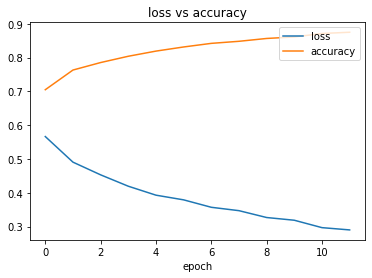

In [55]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['acc'])
pyplot.title('loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show() 

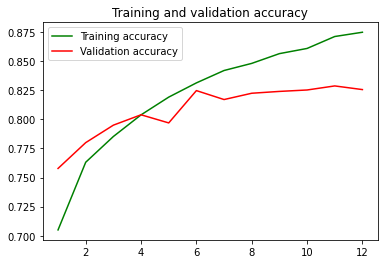

In [56]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()